In [1]:
#from fastai.text import Path, Counter, pickle, torch, to_np, partial, \
#    LanguageModelLoader, LanguageModelData
from fastai.text import *
import html
import pandas as pd
from src.text_tools import fixup, get_texts, get_all
from glob import glob
%load_ext autoreload
%autoreload 2

In [2]:
version = 'v1'
datadir = '/data/smith-monuments-sentiment/data'
LM_PATH=f'{datadir}/{version}/lm/'

In [3]:
data_lm = TextLMDataBunch.from_csv(f'{datadir}/{version}/lm','train.csv', bs=100)
#data_clas = TextClasDataBunch.from_csv(f'{datadir}/{version}/clas', 'train.csv', \
#                                       vocab=data_lm.train_ds.vocab, bs=32)

In [4]:
data_lm.save(f'{datadir}/{version}/lm/data_lm_export.pkl')

In [ ]:
#data_lm = load_data(path, 'data_lm_export.pkl')
#data_clas = load_data(path, 'data_clas_export.pkl', bs=16)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


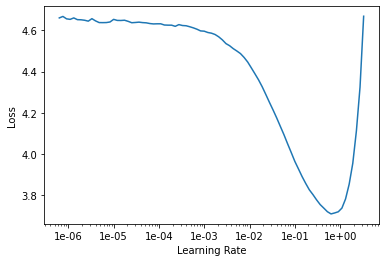

In [5]:
#vocab_sz,emb_sz,nh,nl = 60000,400,1111,2
#config = awd_lstm_lm_config.copy()
#config['nh'] = nh 
#config['nl'] = nl 
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(1, 1e-2)

In [7]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

In [14]:
learn.predict("This is a review about Bears. I don't like them.", n_words=20)

'This is a review about Bears. I don\'t like them. He , i would like to see make none of campus \'s sites " wild " . Corporate'

In [10]:
learn.save_encoder(f'{datadir}/{version}/ft_enc')

## wikitext103 conversion¶
We are now going to build an english language model for the National Monuments corpus. We could start from scratch and try to learn the structure of the english language. But we use a technique called transfer learning to make this process easier. In transfer learning (a fairly recent idea for NLP) a pre-trained LM that has been trained on a large generic corpus(like wikipedia articles) can be used to transfer it's knowledge to a target LM and the weights can be fine-tuned.

We source a LM called the wikitext103 LM created by Stephen Merity @ Salesforce research. 
using the command : wget -nH -r -np -P {PATH} http://files.fast.ai/models/wt103/

In [9]:
learn.show_results()

In [16]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [70, 400]            0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
Linear               [70, 40704]          16,322,304 True      
______________________________________________________________________
RNNDropout           [70, 400]            0          False     
______________________________________________________________________

Total params: 16,322,304
Total trainable params: 16,322,304
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss fu